<h1>Car Price Prediction</h1>

Introducing the "Car Price Prediction" dataset, an extensive compilation of car models and characteristics obtained from various websites. Its purpose is to offer a comprehensive resource for researchers and data scientists interested in constructing regression models to forecast car prices. With its broad array of features, it facilitates the examination of automotive market trends and patterns, making it a valuable asset for regression analysis and industry professionals.

In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.impute import KNNImputer
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#let's load tha dataset
data = pd.read_csv("/content/drive/MyDrive/Data Science/Internship/Assignment/Model Selection/car data.csv")
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
#let's check shape of the dataset
data.shape

(301, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


### Data Preprocessing

In [6]:
#adding column Age, which shows the age of the Car
data["Age"] = dt.date.today().year - data["Year"]

In [7]:
#droping the Year Column
data.drop(["Year"], axis = 1, inplace = True)

In [8]:
#checking description
data.describe()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,4.661296,7.628472,36947.205980,0.043189,9.372093
std,5.082812,8.644115,38886.883882,0.247915,2.891554
min,0.100000,0.320000,500.000000,0.000000,5.000000
25%,0.900000,1.200000,15000.000000,0.000000,7.000000
50%,3.600000,6.400000,32000.000000,0.000000,9.000000
75%,6.000000,9.900000,48767.000000,0.000000,11.000000
max,35.000000,92.600000,500000.000000,3.000000,20.000000


In [9]:
#finding Null Values
data.isnull().sum()

Car_Name         0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
Age              0
dtype: int64

In [10]:
#renaming columns name

data.rename(columns = {"Selling_Price" : "Selling_Price(Lacs)", "Present_Price" : "Present_Price(Lacs)", "Owner" : "Past_Owner"}, inplace = True)

In [11]:
data["Car_Name"].value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

In [12]:
#remove unrequired columns
data.drop(["Car_Name"], axis = 1, inplace = True)

In [13]:
data.head()

,Selling_Price(Lacs),Present_Price(Lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


#### Univariate Analysis

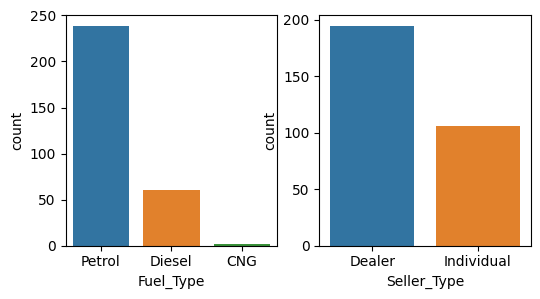

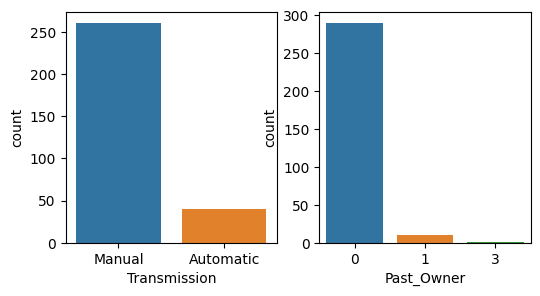

In [14]:
cat_Cols = ["Fuel_Type", "Seller_Type", "Transmission", "Past_Owner"]

i = 0
while i < 4:
  
  fig = plt.figure(figsize=[6,3])

  plt.subplot(1,2,1)
  sns.countplot(x=cat_Cols[i], data=data)
  i += 1
  
  plt.subplot(1,2,2)
  sns.countplot(x=cat_Cols[i], data=data)
  i += 1
  
  plt.show()

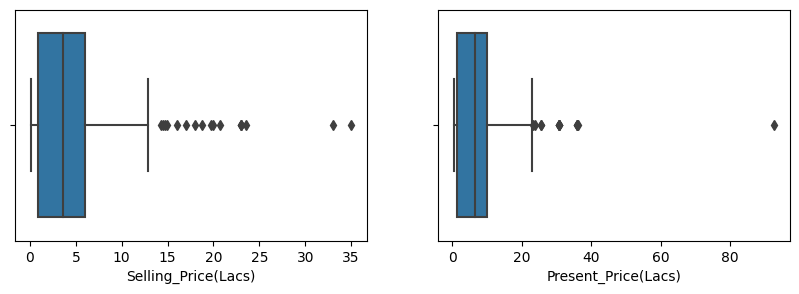

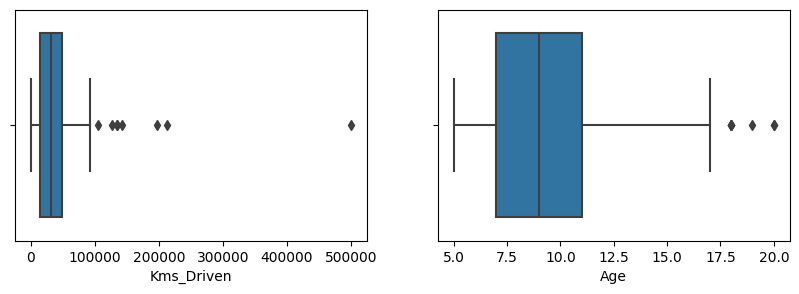

In [15]:
num_cols = ['Selling_Price(Lacs)','Present_Price(Lacs)','Kms_Driven','Age']
i=0
while i < 4:
    fig = plt.figure(figsize=[10,3])

    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=data)
    i += 1

    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i], data=data)
    i += 1
    
    plt.show()

In [16]:
Numerical_col = ['Present_Price(Lacs)', 'Selling_Price(Lacs)', "Kms_Driven"]

Handling Outliers

In [17]:
OUTLIERS_DETECT = ['Present_Price(Lacs)', 'Selling_Price(Lacs)',"Kms_Driven"]

def DetectOutlier_ZScore(data, col_name, Numerical_col):
    col_values = data.loc[:, col_name] # series object
    upper_limit = col_values.mean() + 3*col_values.std()
    lower_limit = col_values.mean() - 3*col_values.std()

    print(" Upper Limit :", upper_limit, " Lower Limit :", lower_limit)

    outliers = np.logical_or(col_values.values > upper_limit, col_values.values < lower_limit) # vector of booleans 
    idxs = np.where(outliers)[0]

    print(" Outliers Detected : ", len(idxs))

    fig = go.Figure()
    fig.add_trace(go.Scatter(x = [i for i in range(data.shape[0])],y = data[col_name],mode = "markers",name = col_name))
    fig.add_trace(go.Scatter(x = [i for i in range(data.shape[0])],y = [upper_limit]*data.shape[0],mode = "lines",name = "higher_value"))
    fig.add_trace(go.Scatter(x = [i for i in range(data.shape[0])],y = [lower_limit]*data.shape[0],mode = "lines",name = "lower_value"))
    fig.show()


    print(" Fixing Outliers ")
    data.loc[idxs, col_name] = np.nan # converting outliers to nulls 
    imputer = KNNImputer()
    data.loc[:, Numerical_col] = imputer.fit_transform(data.loc[:, Numerical_col])

    fig = go.Figure()
    fig.add_trace(go.Scatter(x = [i for i in range(data.shape[0])],y = data[col_name],mode = "markers",name = col_name))
    fig.add_trace(go.Scatter(x = [i for i in range(data.shape[0])],y = [upper_limit]*data.shape[0],mode = "lines",name = "higher_value"))
    fig.add_trace(go.Scatter(x = [i for i in range(data.shape[0])],y = [lower_limit]*data.shape[0],mode = "lines",name = "lower_value"))
    fig.show()


    return data

In [18]:
for outlier_col in OUTLIERS_DETECT:
    data = DetectOutlier_ZScore(data, outlier_col, Numerical_col)

 Upper Limit : 33.56081796684471  Lower Limit : -18.30387444525002
 Outliers Detected :  5


 Fixing Outliers 


<ipython-input-17-febd800a0abd>:25: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



 Upper Limit : 19.909730349596533  Lower Limit : -10.587138987470286
 Outliers Detected :  8


 Fixing Outliers 


 Upper Limit : 153607.8576262701  Lower Limit : -79713.4456661372
 Outliers Detected :  3


 Fixing Outliers 


#### Bivariate/Multi-Variate Analysis

<ipython-input-19-68bfaae9ba08>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



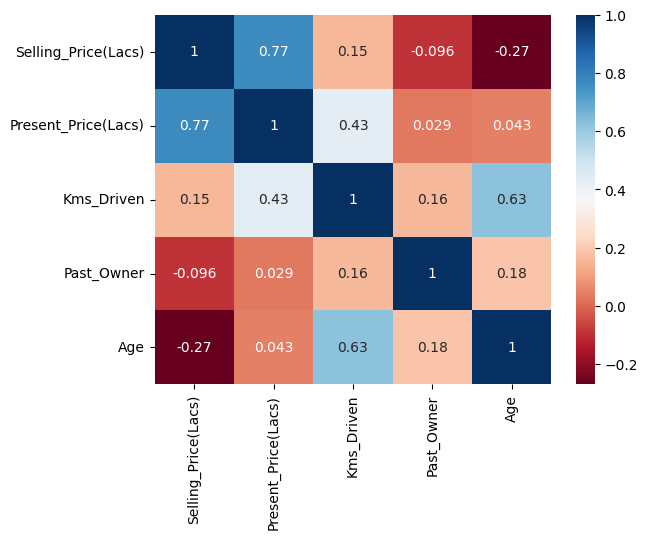

In [19]:
sns.heatmap(data.corr(), annot=True, cmap="RdBu")
plt.show()

In [20]:
#Encoding 

data.replace({"Fuel_Type" : {'Petrol' : 0, "Diesel" : 1, "CNG": 2}}, inplace = True)
data.replace({"Seller_Type" : {'Dealer' : 0, "Individual" : 1}}, inplace = True)
data.replace({"Transmission" : {'Manual' : 0, "Automatic" : 1}}, inplace = True)

In [21]:
data.head()

,Selling_Price(Lacs),Present_Price(Lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owner,Age
0,3.35,5.59,27000.0,0,0,0,0,9
1,4.75,9.54,43000.0,1,0,0,0,10
2,7.25,9.85,6900.0,0,0,0,0,6
3,2.85,4.15,5200.0,0,0,0,0,12
4,4.60,6.87,42450.0,1,0,0,0,9


### Train-Test Split

In [22]:
# Separating target variable and its features
y = data.iloc[:, 0]
x = data.iloc[:, 1:]

In [23]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price(Lacs), Length: 301, dtype: float64


In [24]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = 4)

#### Applying regression models
1. Linear Regression 
2. Ridge Regression
3. Lasso Regression
4. Random Forest Regression

In [25]:
def MeanSquaredError(Actual, Prediction):
    return np.mean(np.square(Actual - Prediction))

def RootMeanSquaredError(Actual, Prediction):
    return np.sqrt(MeanSquaredError(Actual, Prediction))

def MeanAbsoluteError(Actual, Prediction):
    return np.mean(np.abs(Actual - Prediction))

def R2Score(Actual, Prediction):
    # How am I performing compared to mean
    SSR = np.sum(np.square(Actual - Prediction))
    SSM = np.sum(np.square(Actual - np.mean(Actual)))
    return 1 - (SSR/SSM)

# if model = mean, R2Score = 0
# if model is better than mean, R2Score > 0. R2Score > 0.7, > 0.9
# if model is worse than mean, R2Score < 0

def PrintMetrics(Actual, Prediction):
    print(" MeanSquaredError : ", MeanSquaredError(Actual, Prediction))
    print(" RootMeanSquaredError : ", RootMeanSquaredError(Actual, Prediction))
    print(" MeanAbsolutedError : ", MeanAbsoluteError(Actual, Prediction))
    print(" R2 Score : ", R2Score(Actual, Prediction))


####LinearRegression

In [26]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
PrintMetrics(y_test, predictions)

 MeanSquaredError :  2.364277460491339
 RootMeanSquaredError :  1.537620714120143
 MeanAbsolutedError :  1.1194814300961493
 R2 Score :  0.7881063323620182


####RidgeRegression

In [27]:
model = Ridge()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
PrintMetrics(y_test, predictions)

 MeanSquaredError :  2.353587881151909
 RootMeanSquaredError :  1.5341407631478634
 MeanAbsolutedError :  1.1163226260876569
 R2 Score :  0.7890643646613525


####LassoRegression

In [28]:
model = Lasso()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
PrintMetrics(y_test, predictions)

 MeanSquaredError :  2.8220861013639285
 RootMeanSquaredError :  1.6799065751892064
 MeanAbsolutedError :  1.1879868709462083
 R2 Score :  0.7470761429650881


####RandomForestRegressor

In [29]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
PrintMetrics(y_test, predictions)

 MeanSquaredError :  1.2279437304196728
 RootMeanSquaredError :  1.1081262249489778
 MeanAbsolutedError :  0.653815409836066
 R2 Score :  0.8899479840925199
